**IMPORTING REQUIRED LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


**READING DATASET**

In [3]:
df = pd.read_csv( '/content/iris_data.csv' )
df.dropna( inplace = True )


In [4]:
y = df[ 'Species' ].values
x = df.drop( [ 'Id', 'Species' ], axis = 1 ).values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform( y )


In [5]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0 )


**DIFFERENT CLASSIFICATIONS MODELS**

In [6]:
log_regr_model = LogisticRegression()
log_regr_model.fit( x_train, y_train )
print( 'Test accuracy of Logistic Regression is {}%.'.format( log_regr_model.score( x_test, y_test ) * 100 ) )


Test accuracy of Logistic Regression is 100.0%.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


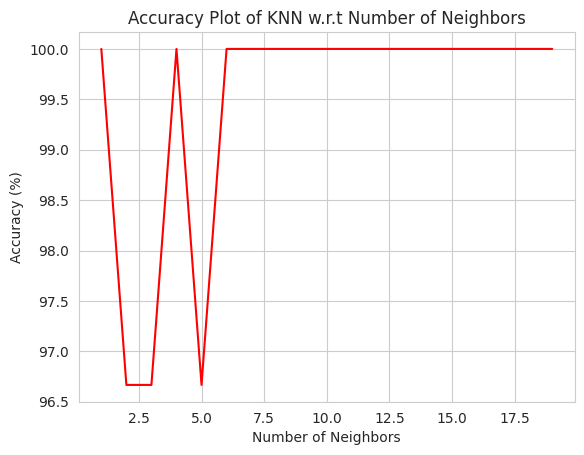

The test accuracy of KNN is 100.0% for 1 neighbors.


In [28]:
accuracies = []
for i in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    accuracies.append(knn_model.score(x_test, y_test) * 100)

plt.plot(range(1, 20), accuracies, color = 'red')
plt.title('Accuracy Plot of KNN w.r.t Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy (%)')
plt.show()

print('The test accuracy of KNN is {}% for {} neighbors.'.format(max(accuracies), accuracies.index(max(accuracies)) + 1))


In [15]:
svm_model = SVC( random_state = 1 )
svm_model.fit( x_train, y_train )
print( 'Test accuracy of SVM is {}%.'.format( svm_model.score( x_test, y_test ) * 100 ) )


Test accuracy of SVM is 100.0%.


In [16]:
nb_model = GaussianNB()
nb_model.fit( x_train, y_train )
print( 'Test accuracy of nb_model is {}%.'.format( nb_model.score( x_test, y_test ) * 100 ) )


Test accuracy of nb_model is 96.66666666666667%.


In [17]:
dt_model = DecisionTreeClassifier()
dt_model.fit( x_train, y_train )
print( 'Test accuracy of Decision Trees is {}%.'.format( dt_model.score( x_test, y_test ) * 100 ) )


Test accuracy of Decision Trees is 100.0%.


In [18]:
rf_model = RandomForestClassifier( n_estimators = 1000, random_state = 1 )
rf_model.fit( x_train, y_train )
print( 'Test accuracy of Random Forest is {}%.'.format( rf_model.score( x_test, y_test ) * 100 ) )


Test accuracy of Random Forest is 100.0%.


**COMPARING DIFFERENT MODELS**

<ipython-input-22-8507a77dfeb3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = methods, y = scores, palette = colors )


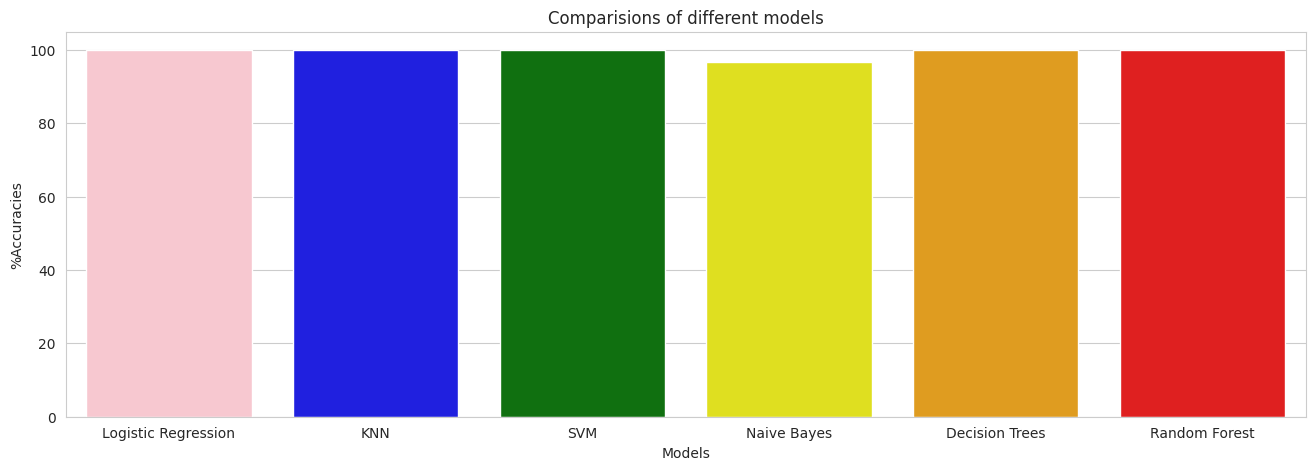

In [22]:
methods = [ 'Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Trees', 'Random Forest' ]
scores = [ log_regr_model.score( x_test, y_test ) * 100, max( accuracies ), svm_model.score( x_test, y_test ) * 100, nb_model.score( x_test, y_test ) * 100, dt_model.score( x_test, y_test ) * 100, rf_model.score( x_test, y_test ) * 100 ]
colors = [ 'pink', 'blue', 'green', 'yellow', 'orange', 'red' ]
sns.set_style( 'whitegrid' )
plt.figure( figsize = ( 16, 5 ) )
sns.barplot( x = methods, y = scores, palette = colors )
plt.title( 'Comparisions of different models' )
plt.xlabel( 'Models' )
plt.ylabel( '%Accuracies' )
plt.show()


In [25]:
print( 'As seen above, everything has full accuracies except Naive Bayes.' )
print( 'Hence, we use Logistic Regression for our predictions.' )


As seen above, everything has full accuracies except Naive Bayes.
Hence, we use Logistic Regression for our predictions.


**PREDICTIONS**

In [26]:
print( x_test.shape )


(30, 4)


In [27]:
data_for_pred = [ [ 30.55, 40, 12, 76 ] ]
predictions = log_regr_model.predict( data_for_pred )
classes = [ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ]
predicted_class = classes[ predictions[ 0 ] ]
print( 'The prediction for the data is: {}.'.format( predicted_class ) )


The prediction for the data is: Iris-virginica.
